# Dark matter landscape plot

### The main purpose of this plot is to showcase the different fonts. It could potentially be useful to people, so it is free to use with credit.

### Warning: the initial rendering of the plot takes around a minute and a half because of the large amount of latex

In [3]:
from numpy import *
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
import matplotlib.cm as cm

from matplotlib.offsetbox import OffsetImage, AnnotationBbox
def PointsAsImages(ax,x, y, file, zoom=1):
    image = plt.imread(file)
    im = OffsetImage(image, zoom=zoom)
    x, y = atleast_1d(x, y)
    artists = []
    for x0, y0 in zip(x, y):
        ab = AnnotationBbox(im, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))

# Choose style sheet:

# Palatino
# plt.style.use('sty.mplstyle') 
# file = 'DMLandscape_Palatino'

# Computer modern
# plt.style.use('sty2.mplstyle')
# file = 'DMLandscape_CM'

# Sans-serif
plt.style.use('sty3.mplstyle')
file = 'DMLandscape_SansSerif'

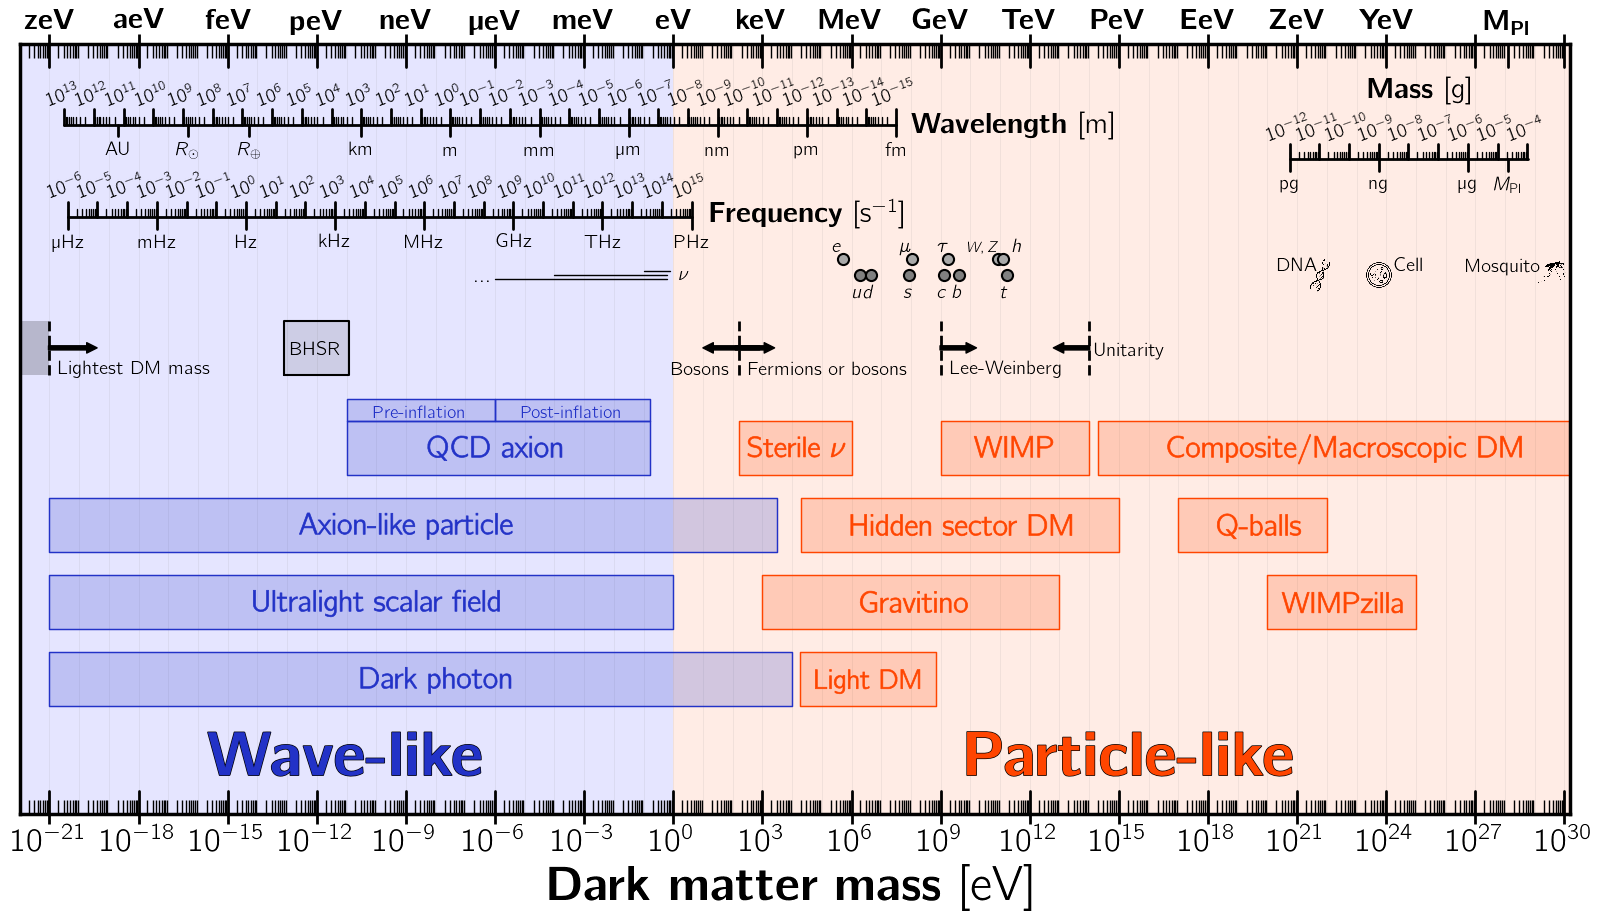

In [4]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot()

# Overall figure
xmin = 1e-22
xmax = 1.5e30
ax.fill_between([xmin,1],[0,0],y2=1,color='blue',alpha=0.1,lw=0,zorder=-100)
ax.fill_between([1,xmax],[0,0],y2=1,color='orangered',alpha=0.1,lw=0,zorder=-100)
plt.text(2e-16,0.05,r'{\bf Wave-like}',fontsize=45,alpha=1,color='#2232c7',path_effects=[pe.Stroke(linewidth=1, foreground='k',alpha=1), pe.Normal()])
plt.text(5e9,0.05,r'{\bf Particle-like}',fontsize=45,alpha=1,color='orangered',path_effects=[pe.Stroke(linewidth=1, foreground='k',alpha=1), pe.Normal()])


# Parameters
labelsize = 14 # ticklabel size
rotation = 20 # tick rotation
ticksize = 0.02 # tick length for axes


# Compton wavelength axis
m2eV_inv = (2*pi)/1.9732705e-7
y = 0.895
ax.plot([3e-21,3e7],[y,y],color='k',lw=2) # axis line
L = 10.0**arange(-15,14)
for i in range(size(L)):
    ax.plot(1/(m2eV_inv*L[i]*array([1,1])),array([y,y+ticksize]),color='k',lw=2) # major ticks
    ax.text(1/(m2eV_inv*L[i]),y+ticksize,r'$10^{%.0f}$'%(log10(L[i])),clip_on=True,fontsize=labelsize,rotation=rotation,ha='center',va='bottom')
    if i<size(L)-1:
        for j in range(1,10):
            ax.plot(1/(m2eV_inv*L[i]*j*array([1,1])),array([y,y+ticksize/2]),color='k',lw=1) # minor ticks
# Extra units
for lab,unit in zip(['AU',r'$R_\odot$',r'$R_\oplus$','km','m','mm',r'\textmu m','nm','pm','fm'],[1.496e11,6.957e8,6000e3,1e3,1,1e-3,1e-6,1e-9,1e-12,1e-15]):
    ax.text(1/(unit*m2eV_inv),y-ticksize*1.1,lab,ha='center',va='top',fontsize=labelsize)
    ax.plot(1/(unit*m2eV_inv)*array([1,1]),array([y,y-0.75*ticksize]),color='k',lw=2)
ax.text(1.0e8,y,r'{\bf Wavelength} [m]',fontsize=labelsize*1.5,va='center',ha='left')



# Compton frequency axis
Hz2eV = 2*pi*6.5821220e-16
y = 0.775
ax.plot([4.3e-21,4],[y,y],color='k',lw=2) # axis line
L = 10.0**arange(-6,16)
for i in range(size(L)):
    ax.plot(Hz2eV*L[i]*array([1,1]),array([y,y+ticksize]),color='k',lw=2) # major ticks
    ax.text(Hz2eV*L[i],y+ticksize,r'$10^{%.0f}$'%(log10(L[i])),clip_on=True,fontsize=labelsize,rotation=rotation,ha='center',va='bottom')
    if i<size(L)-1:
        for j in range(1,10):
            ax.plot(Hz2eV*L[i]*j*array([1,1]),array([y,y+ticksize/2]),color='k',lw=1) # minor ticks
for lab,unit in zip([r'\textmu Hz','mHz','Hz',r'kHz','MHz','GHz','THz','PHz'],[1e-6,1e-3,1,1e3,1e6,1e9,1e12,1e15]):
    ax.text(unit*Hz2eV,y-ticksize*1.1,lab,ha='center',va='top',fontsize=labelsize)
    ax.plot(unit*Hz2eV*array([1,1]),array([y,y-0.75*ticksize]),color='k',lw=2)
ax.text(0.17e2,y+0.005,r'{\bf Frequency} [s$^{-1}$]',fontsize=labelsize*1.5,va='center',ha='left')


# Mass axis
g2eV = 1/1.7826627e-33
y = 0.85
ax.plot([6e20,6e28],[y,y],color='k',lw=2) # axis line
L = 10.0**arange(-12,-3)
for i in range(size(L)):
    ax.plot(g2eV*L[i]*array([1,1]),array([y,y+ticksize]),color='k',lw=2,clip_on=False)
    ax.text(g2eV*L[i],y+ticksize,r'$10^{%.0f}$'%(log10(L[i])),clip_on=True,fontsize=labelsize,rotation=rotation,ha='center',va='bottom')
    if i<size(L)-1:
        for j in range(1,10):
            ax.plot(g2eV*L[i]*j*array([1,1]),array([y,y+ticksize/2]),color='k',lw=1)

for lab,unit in zip(['pg','ng',r'\textmu g',r'$M_{\rm Pl}$'],[1e-12*g2eV,1e-9*g2eV,1e-6*g2eV,1.22e19*1e9]):
    ax.text(unit,y-ticksize*1.1,lab,ha='center',va='top',fontsize=labelsize)
    ax.plot(unit*array([1,1]),array([y,y-0.75*ticksize]),color='k',lw=2)
ax.text(1e27,y+0.09,r'{\bf Mass} [g]',fontsize=labelsize*1.5,va='center',ha='right')



# Standard model particles
yp = 0.72
col = 'darkgray'
for m,lab in zip([511e3,105.7e6,1780e6],[r'$e$',r'$\mu$',r'$\tau$']):
    plt.plot(m,yp,'o',mec='k',mfc=col,markersize=8,mew=1.5)
    plt.text(m/1.6,yp+0.01,lab,fontsize=labelsize,color='k',ha='center')
yp = 0.7
col = [0.5,0.5,0.5]
for m,lab in zip([1.9e6,4.4e6,87e6,1320e6,4240e6,172700e6],[r'$u$',r'$d$',r'$s$',r'$c$',r'$b$',r'$t$']):
    plt.plot(m,yp,'o',mec='k',mfc=col,markersize=8,mew=1.5)
    plt.text(m/1.2,yp-0.03,lab,fontsize=labelsize,color='k',ha='center')
yp = 0.72
col = 'darkgray'
for m,lab in zip([85.0e9],['$W,Z$']):
    plt.plot(m,yp,'o',mec='k',mfc=col,markersize=8,mew=1.5)
    plt.text(m/3.3,yp+0.01,lab,fontsize=labelsize-3,color='k',ha='center')
yp = 0.72
col = 'darkgray'
for m,lab in zip([125.11e9],[r'$h$']):
    plt.plot(m,yp,'o',mec='k',mfc=col,markersize=8,mew=1.5)
    plt.text(m*3,yp+0.01,lab,fontsize=labelsize,color='k',ha='center')


# DNA
PointsAsImages(ax,g2eV*1e-11,0.7, 'images/dna.png', zoom=0.05)
plt.text(g2eV*1e-11*0.95,0.7,'DNA',fontsize=labelsize,ha='right',va='bottom')

# Cell
PointsAsImages(ax,g2eV*1e-9,0.7, 'images/cell.png', zoom=0.1)
plt.text(g2eV*1e-9*3,0.7,'Cell',fontsize=labelsize,ha='left',va='bottom')

# Mosquito
PointsAsImages(ax,g2eV*0.8e-3,0.7, 'images/mosquito.png', zoom=0.012)
plt.text(g2eV*0.8e-3/2.5,0.7,'Mosquito',fontsize=labelsize,ha='right',va='bottom')


# Neutrinos
ax.plot([1e-6,0.6],[0.695,0.695],'k-',lw=1)
ax.plot([1e-4,0.6],[0.7,0.7],'k-',lw=1)
ax.plot([0.1,0.8],[0.705,0.705],'k-',lw=1)
ax.text(1.5,0.7,r'$\nu$',ha='left',va='center',fontsize=labelsize)
ax.text(0.8e-6,0.699,r'...',ha='right',va='center',fontsize=labelsize)

# Fuzzy dark matter bound
ax.plot([1e-21,1e-21],[0.57,0.64],'k--',lw=2)
ax.fill_between([1e-22,1e-21],[0.57,0.57],y2=0.64,color='k',alpha=0.2,lw=0)
ax.annotate("",xy=(5e-20,0.605), xycoords='data',xytext=(0.75e-21,0.605), textcoords='data',size=15,arrowprops=dict(arrowstyle="simple",facecolor='k'))
ax.text(2e-21,0.57,'Lightest DM mass',fontsize=labelsize)

# Black hole superradiance
ax.fill_between([0.8e-13,1.2e-11],[0.57,0.57],y2=0.64,color='k',alpha=0.1,lw=0)
ax.plot([0.8e-13,1.2e-11,1.2e-11,0.8e-13,0.8e-13],[0.57,0.57,0.64,0.64,0.57],color='k',lw=1.5)
ax.text(1.3e-13,0.595,'BHSR',fontsize=labelsize)

# Tremaine-Gunn bound
ax.plot([0.16e3,0.16e3],[0.57,0.64],'k--',lw=2)
ax.annotate("",xy=(0.16e3*20,0.605), xycoords='data',xytext=(0.1e3,0.605), textcoords='data',size=15,arrowprops=dict(arrowstyle="simple",facecolor='k'))
ax.annotate("",xy=(0.16e3/20,0.605), xycoords='data',xytext=(1e3,0.605), textcoords='data',size=15,arrowprops=dict(arrowstyle="simple",facecolor='k'))
ax.text(0.16e3/2,0.57,'Bosons',fontsize=labelsize,ha='right')
ax.text(0.16e3*2,0.57,'Fermions or bosons',fontsize=labelsize,ha='left')

# Lee Weinberg
ax.plot([1e9,1e9],[0.57,0.64],'k--',lw=2)
ax.annotate("",xy=(1e9*20,0.605), xycoords='data',xytext=(1e9/1.3,0.605), textcoords='data',size=15,arrowprops=dict(arrowstyle="simple",facecolor='k'))
ax.text(2e9,0.57,'Lee-Weinberg',fontsize=labelsize,ha='left')

# Unitarity bound
ax.plot([100e12,100e12],[0.57,0.64],'k--',lw=2)
ax.annotate("",xy=(100e12/20,0.605), xycoords='data',xytext=(100e12*1.29,0.605), textcoords='data',size=15,arrowprops=dict(arrowstyle="simple",facecolor='k'))
ax.text(150e12,0.595,'Unitarity',fontsize=labelsize,ha='left')


##### Dark matter models

# QCD axion
thick = 0.07
ytop = 0.44
y0 = ytop
ax.fill_between([1e-11,0.16],[y0,y0],y2=y0+thick,alpha=0.2,color='#2232c7',lw=1)
ax.fill_between([1e-11,0.16],[y0,y0],y2=y0+thick,lw=1,facecolor=[0,0,0,0],edgecolor='#2232c7')
ax.text(1e-6,y0+thick/2.1,r' QCD axion',color='#2232c7',ha='center',va='center',fontsize=22,path_effects=[pe.Stroke(linewidth=0.5, foreground='#2232c7',alpha=1)])
ax.fill_between([1e-11,1e-6],[y0+thick,y0+thick],y2=y0+thick+thick/2.5,alpha=0.2,color='#2232c7')
ax.fill_between([1e-6,0.16],[y0+thick,y0+thick],y2=y0+thick+thick/2.5,alpha=0.2,color='#2232c7')
ax.fill_between([1e-11,1e-6],[y0+thick,y0+thick],y2=y0+thick+thick/2.5,facecolor=[0,0,0,0],edgecolor='#2232c7',lw=1)
ax.fill_between([1e-6,0.16],[y0+thick,y0+thick],y2=y0+thick+thick/2.5,facecolor=[0,0,0,0],edgecolor='#2232c7',lw=1)
ax.text(3e-9,y0+thick*1.14,r'Pre-inflation',color='#2232c7',ha='center',va='center',fontsize=13)
ax.text(4e-4,y0+thick*1.14,r'Post-inflation',color='#2232c7',ha='center',va='center',fontsize=13)

# ALPs
y0 = ytop-thick-0.03
ax.fill_between([1e-21,3e3],[y0,y0],y2=y0+thick,alpha=0.2,color='#2232c7')
ax.fill_between([1e-21,3e3],[y0,y0],y2=y0+thick,lw=1,facecolor=[0,0,0,0],edgecolor='#2232c7')
ax.text(1e-9,y0+thick/2.1,r'Axion-like particle',color='#2232c7',ha='center',va='center',fontsize=22,path_effects=[pe.Stroke(linewidth=0.5, foreground='#2232c7',alpha=1)])

# Scalars
y0 = ytop-2*thick-2*0.03
ax.fill_between([1e-21,1],[y0,y0],y2=y0+thick,alpha=0.2,color='#2232c7')
ax.fill_between([1e-21,1],[y0,y0],y2=y0+thick,lw=1,facecolor=[0,0,0,0],edgecolor='#2232c7')
ax.text(1e-10,y0+thick/2.1,r'Ultralight scalar field',color='#2232c7',ha='center',va='center',fontsize=22,path_effects=[pe.Stroke(linewidth=0.5, foreground='#2232c7',alpha=1)])

# Dark photons
y0 = ytop-3*thick-3*0.03
ax.fill_between([1e-21,1e4],[y0,y0],y2=y0+thick,alpha=0.2,color='#2232c7')
ax.fill_between([1e-21,1e4],[y0,y0],y2=y0+thick,lw=1,facecolor=[0,0,0,0],edgecolor='#2232c7')
ax.text(1e-8,y0+thick/2.1,r'Dark photon',color='#2232c7',ha='center',va='center',fontsize=22,path_effects=[pe.Stroke(linewidth=0.5, foreground='#2232c7',alpha=1)])


# Particle-like
y0 = ytop
ax.fill_between([1e9,100e12],[y0,y0],y2=y0+thick,alpha=0.2,color='orangered')
ax.fill_between([1e9,100e12],[y0,y0],y2=y0+thick,lw=1,facecolor=[0,0,0,0],edgecolor='orangered')
ax.text(300e9,y0+thick/2.1,r'WIMP',color='orangered',ha='center',va='center',fontsize=22,path_effects=[pe.Stroke(linewidth=0.5, foreground='orangered',alpha=1)])

# LDM
y0 = ytop-3*thick-3*0.03
ax.fill_between([18e3,0.7e9],[y0,y0],y2=y0+thick,alpha=0.2,color='orangered')
ax.fill_between([18e3,0.7e9],[y0,y0],y2=y0+thick,lw=1,facecolor=[0,0,0,0],edgecolor='orangered')
ax.text(3.5e6,y0+thick/2.2,r'Light DM',color='orangered',ha='center',va='center',fontsize=20,path_effects=[pe.Stroke(linewidth=0.5, foreground='orangered',alpha=1)])

# Hidden sector
y0 = ytop-thick-0.03
ax.fill_between([2e4,1e15],[y0,y0],y2=y0+thick,alpha=0.2,color='orangered')
ax.fill_between([2e4,1e15],[y0,y0],y2=y0+thick,lw=1,facecolor=[0,0,0,0],edgecolor='orangered')
ax.text(500e7,y0+thick/2.2,r'Hidden sector DM',color='orangered',ha='center',va='center',fontsize=22,path_effects=[pe.Stroke(linewidth=0.5, foreground='orangered',alpha=1)])

# Macro
y0 = ytop
ax.fill_between([200e12,xmax],[y0,y0],y2=y0+thick,alpha=0.2,color='orangered')
ax.fill_between([200e12,xmax],[y0,y0],y2=y0+thick,lw=1,facecolor=[0,0,0,0],edgecolor='orangered')
ax.text(4e22,y0+thick/2.1,r'Composite/Macroscopic DM',color='orangered',ha='center',va='center',fontsize=22,path_effects=[pe.Stroke(linewidth=0.5, foreground='orangered',alpha=1)])

# Sterile nu
y0 = ytop
ax.fill_between([0.16e3,100e4],[y0,y0],y2=y0+thick,alpha=0.2,color='orangered')
ax.fill_between([0.16e3,100e4],[y0,y0],y2=y0+thick,lw=1,facecolor=[0,0,0,0],edgecolor='orangered')
ax.text(13e3,y0+thick/2.1,r'Sterile $\nu$',color='orangered',ha='center',va='center',fontsize=21,path_effects=[pe.Stroke(linewidth=0.5, foreground='orangered',alpha=1)])

# WIMPzilla
y0 = ytop-2*thick-2*0.03
ax.fill_between([1e11*1e9,1e16*1e9],[y0,y0],y2=y0+thick,alpha=0.2,color='orangered')
ax.fill_between([1e11*1e9,1e16*1e9],[y0,y0],y2=y0+thick,lw=1,facecolor=[0,0,0,0],edgecolor='orangered')
ax.text(3.5e22,y0+thick/2.25,r'WIMPzilla',color='orangered',ha='center',va='center',fontsize=22-0.5,path_effects=[pe.Stroke(linewidth=0.5, foreground='orangered',alpha=1)])

# Q-BALL
y0 = ytop-thick-0.03
ax.fill_between([1e5*1e12,1e10*1e12],[y0,y0],y2=y0+thick,alpha=0.2,color='orangered')
ax.fill_between([1e5*1e12,1e10*1e12],[y0,y0],y2=y0+thick,lw=1,facecolor=[0,0,0,0],edgecolor='orangered')

ax.text(5e19,y0+thick/2.2,r'Q-balls',color='orangered',ha='center',va='center',fontsize=22,path_effects=[pe.Stroke(linewidth=0.5, foreground='orangered',alpha=1)])

# Gravitino
y0 = ytop-2*thick-2*0.03
ax.fill_between([1e-6*1e9,1e4*1e9],[y0,y0],y2=y0+thick,alpha=0.2,color='orangered')
ax.fill_between([1e-6*1e9,1e4*1e9],[y0,y0],y2=y0+thick,lw=1,facecolor=[0,0,0,0],edgecolor='orangered')

ax.text(0.12e9,y0+thick/2.2,r'Gravitino',color='orangered',ha='center',va='center',fontsize=22,path_effects=[pe.Stroke(linewidth=0.5, foreground='orangered',alpha=1)])




#### Setting global axis properties

# Top axis
for lab,unit in zip(['zeV','aeV','feV','peV','neV',r'\textmu eV','meV','eV','keV','MeV','GeV','TeV','PeV','EeV','ZeV','YeV',r'$\mathbf{M}_{\bf Pl}$'],concatenate((10.0**arange(-21,27,3),array([1.22e19*1e9])))):
    ax.text(unit,1.045,r'{\bf '+lab+r'}',ha='center',va='top',fontsize=labelsize*1.5)
for unit in 10.0**arange(-21,33,3):
    ax.plot([unit,unit],[1,1-ticksize*1.5],'k-',lw=2)
    ax.plot([unit,unit],[0,ticksize*1.5],'k-',lw=2)
ax.plot([1.22e19*1e9,1.22e19*1e9],[1,1-ticksize*1.5],'k-',lw=2)

# Bottom axis
ax.set_xscale('log')
locmaj = matplotlib.ticker.LogLocator(base=10.0, subs=(1.0, ), numticks=50)
locmin = matplotlib.ticker.LogLocator(base=10.0, subs=arange(2, 10)*.1,numticks=100)
ax.xaxis.set_major_locator(locmaj)
ax.xaxis.set_minor_locator(locmin)
ax.tick_params(which='major',labelsize=labelsize*1.7,labeltop=False,rotation=0,pad=4,tickdir='out',length=7)
ax.set_xticks(10.0**arange(-21,32,3))
ax.set_xlim([xmin,xmax])
ax.set_ylim([0,1])
ax.set_yticks([])
for x in 10.0**arange(-21,32):
    ax.axvline(x,color='gray',alpha=0.15,lw=0.5,zorder=-100)
plt.xlabel(r'{\bf Dark matter mass} [eV]',fontsize=35)


plt.savefig('../plots/'+file+'.pdf',transparent=False,bbox_inches='tight',dpi=1000)
plt.savefig('../plots/plots_png/'+file+'.png',transparent=False,bbox_inches='tight',dpi=200)